# Actividad 02 - El Perceptrón como compuerta lógica

****Centro Universitario de Ciencias Exactas e Ingenierías****\
**Materia** Inteligencia artificial 2\
**Nombre:** Mejia Blanco Erick\
**Código:** 211408613

### Modelo de McCulloch-Pitts  
La neurona de McCulloch-Pitts es una unidad de cálculo que intenta modelar el comportamiento de una neurona "natural", similares a las que constituyen del cerebro humano. Ella es la unidad esencial con la cual se construye una red neuronal artificial. El resultado del cálculo en una neurona consiste en realizar una suma ponderada de las entradas, seguida de la aplicación de una función no lineal.\
El modelo neuronal de McCulloch y Pitts de 1943, Threshold Logic Unit (TLU), o Linear Threshold Unit, fue el primer modelo neuronal moderno, y ha servido de inspiración para el desarrollo de otros modelos neuronales. Sin embargo, en muchos de los estudios en que refieren a este modelo, no se interpreta correctamente el sentido que quisieron dar originalmente McCulloch y Pitts, atribuyéndole características o funciones que no fueron descritas por sus autores, o restándole importancia a la capacidad de procesamiento del modelo. Por otro lado, el modelo McCulloch-Pitts por sí mismo está retomando importancia debido a que es uno de los pocos modelos digitales en tiempo discreto y, como para realizar implantaciones electrónicas o computacionales de las neuronas artificiales en la actualidad se utilizan sistemas digitales, con la mayoría de los modelos analógicos actuales es necesario realizar ciertas adaptaciones a los modelos al momento de implantarlos, lo que dificulta y hace imprecisa dicha implantación con respecto al comportamiento teórico derivado del modelo.\
Usos de las neuronas:

- Permite hacer funciones lógicas
- Primera aproximación a las redes neuronales
- Capacidad de computación universal (puede simular cualquier programa computable)

### Algoritmo del Perceptrón
En el campo de las Redes Neuronales, el perceptrón, creado por Frank Rosenblatt, se refiere a:\
La neurona artificial o unidad básica de inferencia en forma de discriminador lineal, a partir de lo cual se desarrolla un algoritmo capaz de generar un criterio para seleccionar un sub-grupo a partir de un grupo de componentes más grande.\
La limitación de este algoritmo es que si dibujamos en un gráfico estos elementos, se deben poder separar con un hiperplano únicamente los elementos "deseados" discriminándolos (separándolos) de los "no deseados".\
El perceptrón puede utilizarse con otros tipos de perceptrones o de neurona artificial, para formar una red neuronal artificial más compleja\
El modelo biológico más simple de un perceptrón es una neurona y viceversa. Es decir, el modelo matemático más simple de una neurona es un perceptrón. La neurona es una célula especializada y caracterizada por poseer una cantidad indefinida de canales de entrada llamados dendritas y un canal de salida llamado axón. Las dendritas operan como sensores que recogen información de la región donde se hallan y la derivan hacia el cuerpo de la neurona que reacciona mediante una sinapsis que envía una respuesta hacia el cerebro, esto en el caso de los seres vivos.\
Una neurona sola y aislada carece de razón de ser. Su labor especializada se torna valiosa en la medida en que se asocia a otras neuronas, formando una red. Normalmente, el axón de una neurona entrega su información como "señal de entrada" a una dendrita de otra neurona y así sucesivamente. El perceptrón que capta la señal en adelante se extiende formando una red de neuronas, sean éstas biológicas o de sustrato semiconductor (compuertas lógicas).\
El perceptrón usa una matriz para representar las redes neuronales y es un discriminador terciario que traza su entrada x (un vector binario) a un único valor de salida f(x) (un solo valor binario) a través de dicha matriz.\
En el perceptrón, existen dos tipos de aprendizaje, el primero utiliza una tasa de aprendizaje mientras que el segundo no la utiliza. Esta tasa de aprendizaje amortigua el cambio de los valores de los pesos.

### Implementación

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def perceptron(x, y, w, b, eta):
    correct = 0
    iters = 0
    y_pred = 0
    z = None
    while correct is not 4 and iters < 500:
        correct = 0
        iters += 1
        for i in range(4):
            # Prediction
            z = (w.conj().T @ x[:,i] + b).sum()
            if z > 0:
                y_pred = 1
            else:
                y_pred = 0
            #training
            if y[i] == y_pred:
                correct += 1
            else:
                w = w + (eta * (y[i] - y_pred) * x[:, i].reshape(2,1))
                b = b + eta * (y[i] - y_pred)
    print('iteraciones', iters, 'correctos', correct)
    return [w, b]


### Compuerta AND

In [35]:
# Training data
x = np.array([
    [0, 1, 0, 1],
    [0, 0, 1, 1]
])
x

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [36]:
y = np.array([0, 0, 0, 1])
y

array([0, 0, 0, 1])

In [37]:
# Model Parameters
w = -1 + 2 * np.random.rand(2, 1)
w

array([[-0.52285179],
       [ 0.28401554]])

In [38]:
b = -1 + 2 * np.random.rand()
b

-0.8040998430772335

In [39]:
eta = 0.5
eta

0.5

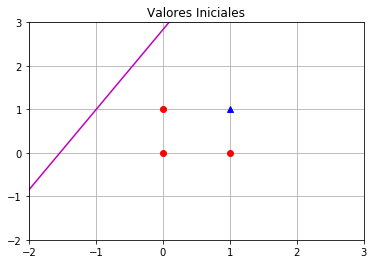

In [40]:
plt.title("Valores Iniciales")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'or')
plt.plot(x[0,2],x[1,2],'or')
plt.plot(x[0,3],x[1,3],'^b')
plt.plot([-2,3],[(-w[0]/w[1])*(-2)-(b/w[1]),(-w[0]/w[1])*(3)-(b/w[1])],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [41]:
w_res, b_res = perceptron(x,y,w,b,eta)

iteraciones 7 correctos 4


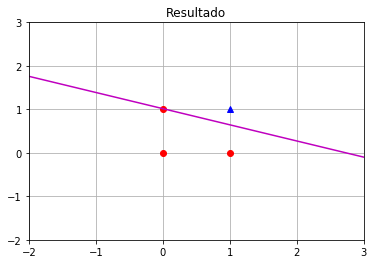

In [42]:
plt.title("Resultado")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'or')
plt.plot(x[0,2],x[1,2],'or')
plt.plot(x[0,3],x[1,3],'^b')
plt.plot([-2,3],[
    (-w_res[0]/w_res[1])*(-2)-(b_res/w_res[1]),
    (-w_res[0]/w_res[1])*(3)-(b_res/w_res[1])
],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [43]:
w_res

array([[0.47714821],
       [1.28401554]])

In [44]:
b_res

-1.3040998430772335

### Compuerta OR

In [45]:
# Training data
x = np.array([
    [0, 1, 0, 1],
    [0, 0, 1, 1]
])
x

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [46]:
y = np.array([0, 1, 1, 1])
y

array([0, 1, 1, 1])

In [47]:
# Model Parameters
w = -1 + 2 * np.random.rand(2, 1)
w

array([[-0.57890842],
       [ 0.01817245]])

In [48]:
b = -1 + 2 * np.random.rand()
b

0.035436383829738016

In [49]:
eta = 0.5
eta

0.5

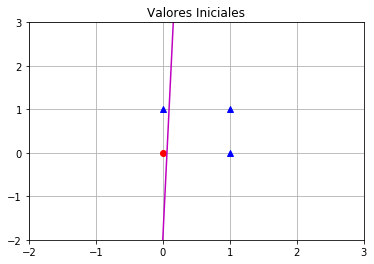

In [50]:
plt.title("Valores Iniciales")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'^b')
plt.plot(x[0,2],x[1,2],'^b')
plt.plot(x[0,3],x[1,3],'^b')
plt.plot([-2,3],[(-w[0]/w[1])*(-2)-(b/w[1]),(-w[0]/w[1])*(3)-(b/w[1])],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [51]:
w_res, b_res = perceptron(x,y,w,b,eta)

iteraciones 5 correctos 4


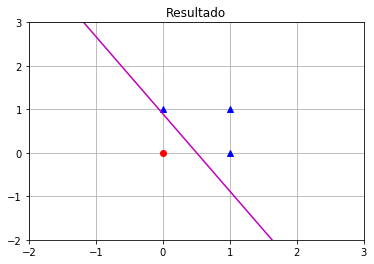

In [52]:
plt.title("Resultado")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'^b')
plt.plot(x[0,2],x[1,2],'^b')
plt.plot(x[0,3],x[1,3],'^b')
plt.plot([-2,3],[
    (-w_res[0]/w_res[1])*(-2)-(b_res/w_res[1]),
    (-w_res[0]/w_res[1])*(3)-(b_res/w_res[1])
],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [53]:
w_res

array([[0.92109158],
       [0.51817245]])

In [54]:
b_res

-0.464563616170262

### Compuerta XOR

In [55]:
# Training data
x = np.array([
    [0, 1, 0, 1],
    [0, 0, 1, 1]
])
x

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [56]:
y = np.array([0, 1, 1, 0])
y

array([0, 1, 1, 0])

In [57]:
# Model Parameters
w = -1 + 2 * np.random.rand(2, 1)
w

array([[0.60458742],
       [0.62302067]])

In [58]:
b = -1 + 2 * np.random.rand()
b

-0.9454407013073756

In [59]:
eta = 0.5
eta

0.5

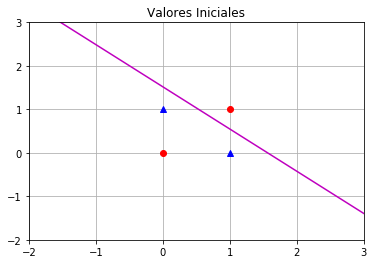

In [60]:
plt.title("Valores Iniciales")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'^b')
plt.plot(x[0,2],x[1,2],'^b')
plt.plot(x[0,3],x[1,3],'or')
plt.plot([-2,3],[(-w[0]/w[1])*(-2)-(b/w[1]),(-w[0]/w[1])*(3)-(b/w[1])],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [61]:
w_res, b_res = perceptron(x,y,w,b,eta)

iteraciones 500 correctos 0


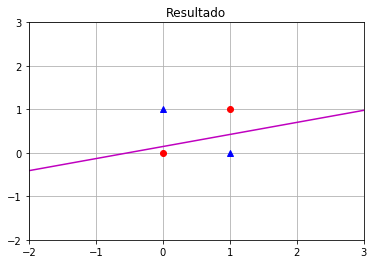

In [62]:
plt.title("Resultado")
plt.grid(True)
plt.plot(x[0,0],x[1,0],'or')
plt.plot(x[0,1], x[1,1],'^b')
plt.plot(x[0,2],x[1,2],'^b')
plt.plot(x[0,3],x[1,3],'or')
plt.plot([-2,3],[
    (-w_res[0]/w_res[1])*(-2)-(b_res/w_res[1]),
    (-w_res[0]/w_res[1])*(3)-(b_res/w_res[1])
],'-m')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()

In [63]:
w_res

array([[ 0.10458742],
       [-0.37697933]])

In [64]:
b_res

0.054559298692624436

### ¿Por que la compuerta XOR no puede ser aprendida por este modelo?
La función XOR no puede ser aprendida por un único perceptrón puesto que requiere al menos de dos líneas para separar las clases (0 y 1). Debe utilizarse al menos una capa adicional de perceptrones para permitir su aprendizaje.

### ¿Que importancia tiene el factor de aprendizaje?
Bastante ya que gracias a el es como se puede saber que tanto va a necesitar reajustar sus valores para que el perceptron aprenda de la manera adecuada y se puedan obtener las mejores soluciones.